Run the code cell below with the ▶| button above to set up this notebook, or type `SHIFT-ENTER`:

In [3]:
from datascience import *
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import Image, display
import ipywidgets as widgets
from scipy import stats
import pandas as pd
from scripts.gws_module import *
%matplotlib inline

# Welcome to GWS-131's Data Science Module!

# Part 1: Introduction to Python and Jupyter Notebooks:

## 1. Cells, Arithmetic, and Code
In a notebook, each rectangle containing text or code is called a *cell*.

Cells (like this one) can be edited by double-clicking on them. This cell is a text cell, written in a simple format called [Markdown](http://daringfireball.net/projects/markdown/syntax) to add formatting and section headings.  You don't need to worry about Markdown today, but it's a pretty fun+easy tool to learn.

After you edit a cell, click the "run cell" button at the top that looks like ▶| to confirm any changes. (Try not to delete the instructions.) You can also press `SHIFT-ENTER` to run any cell or progress from one cell to the next.

Other cells contain code in the Python3 programming language.  Running a code cell will execute all of the code it contains.

Try running this cell:

In [4]:
print("Hello, World!")

Hello, World!


We will now quickly go through some very basic functionality of Python, which we'll be using throughout the rest of this notebook.

### 1.1 Arithmetic
Quantitative information arises everywhere in data science. In addition to representing commands to print out lines, expressions can represent numbers and methods of combining numbers. 

The expression `3.2500` evaluates to the number 3.25. (Run the cell and see.)

In [5]:
3.2500

3.25

We don't necessarily always need to say "print", because Jupyter always prints the last line in a code cell. If you want to print more than one line, though, do specify "print".

In [6]:
print(3)
4
5

3


5

Many basic arithmetic operations are built in to Python, like `*` (multiplication), + (addition), - (subtraction), and / (division). There are many others, which you can find information about [here](http://www.inferentialthinking.com/chapters/03/1/expressions.html). Use parenthesis to specify the order of operations, which act according to PEMDAS, just as you may have learned in school. Use parentheses for a happy new year!

In [7]:
1+(6*5-(6*3))**2*((2**3)/4*7)

2017.0

### 1.2 Variables

We sometimes want to work with the result of some computation more than once. To be able to do that without repeating code everywhere we want to use it, we can store it in a variable with *assignment statements*, which have the variable name on the left, an equals sign, and the expression to be evaluated and stored on the right. In the cell below, `(3 * 11 + 5) / 2 - 9` evaluates to 10, and gets stored in the variable `twenty`.

In [8]:
twenty = (3 * 11 + 5) / 2 - 9
twenty

10.0

In [9]:
twenty

10.0

## 2. Functions

    
One important form of an expression is the call expression, which first names a function and then describes its arguments. The function returns some value, based on its arguments. Some important mathematical functions are

| Function | Description                                                   |
|----------|---------------------------------------------------------------|
| `abs`      | Returns the absolute value of its argument                    |
| `max`      | Returns the maximum of all its arguments                      |
| `min`      | Returns the minimum of all its arguments                      |
| `round`    | Round its argument to the nearest integer                     |

Here are two call expressions that both evaluate to 3

```python
abs(2 - 5)
max(round(2.8), min(pow(2, 10), -1 * pow(2, 10)))
```

These function calls first evaluate the expressions in the arguments (inside the parentheses), then evaluate the function on the results. `abs(2-5)` evaluates first to `abs(3)`, then returns `3`.

A **statement** is a whole line of code.  Some statements are just expressions, like the examples above, that can be broken down into its subexpressions which get evaluated individually before evaluating the statement as a whole.


### 2.1 Calling functions

The most common way to combine or manipulate values in Python is by calling functions. Python comes with many built-in functions that perform common operations.

For example, the `abs` function takes a single number as its argument and returns the absolute value of that number.  The absolute value of a number is its distance from 0 on the number line, so `abs(5)` is 5 and `abs(-5)` is also 5.

In [10]:
abs(5)

5

In [11]:
abs(-5)

5

Functions can be called as above, putting the argument in parentheses at the end, or by using "dot notation", and calling the function after finding the arguments, as in the cell immediately below.

In [12]:
nums = make_array(1,2,5) # a list of items, in this case, numbers
nums.max()

5

In [13]:
max(nums)

5

# Part 2: Tables

Now it's time to work with tables and explore some real data. We've arranged the order of the datasets by geographic proximity.

## 1. UC Berkeley, Ladder Rank Equivalent Faculty

We're going to start right here at UCB! These data are from Fall 2015. These data are from the *UC Corporate Personnel System*, and gives us the ratio of female ladder rank equivalent (LRE), which are tenure and tenure track faculty at Berkeley, in the respective divisions.

**Note**: STEM includes engineering and computer science, life sciences, math, medicine, other health sciences and physical sciences.

To read in a file to a table, we use the general syntax:

```python
Table.read_table("file_name")
```

Most often, these file names end in `.csv` to show the data format. `.csv` format is popular for spreadsheets and can be imported/exported from programs such as Microsoft Excel, OpenOffice Calc, or Google spreadsheets.

In [56]:
UCB_LRE_female = Table.read_table('data/UCB-percent-female-LRE.csv').drop(1)
UCB_LRE_female.show()

Discipline,Fall 2000,Fall 2005,Fall 2010,Fall 2015
Intdisc & Other,0.39,0.42,0.45,0.43
Arts & Humanities,0.37,0.41,0.43,0.45
Oth Health Sci,0.35,0.39,0.45,0.44
Soc Sci & Psych,0.3,0.35,0.38,0.41
Professional,0.29,0.33,0.37,0.38
Life Sci (STEM),0.2,0.23,0.25,0.29
Medicine,0.15,0.18,0.2,0.25
Phys Sci/Math (STEM),0.1,0.13,0.17,0.18
Eng & CS (STEM),0.08,0.11,0.14,0.16


That was easy! Now that we have these data stored in the `UCB_LRE_female` table, we can start getting some information from it.

This notebook can calculate how large this table is with two functions: `num_rows` and `num_columns`. The general form for these functions are `<table>.num_rows` and `<table>.num_columns`. 

Let's use these on the table above. 

In [57]:
UCB_LRE_female.num_rows

9

In [58]:
UCB_LRE_female.num_columns

5

This table is `9x5`. This is a manageable size for a table.

We can quickly plot these data on a bar graph using the `barh` function, so that we can best visually compare between disciplines over time.

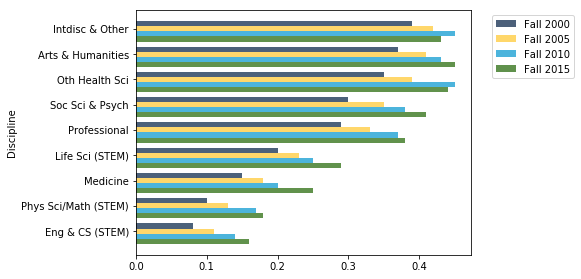

In [59]:
UCB_LRE_female.barh('Discipline')

#### Question: What do you notice about the proportions of female LRE faculty across disciplines? Discuss with the people around you, and write a few sentences about it below. 

---

We can use the `transpose` function to flip the rows and columns so we can get a better set up for time series data:

In [60]:
transposed_table = transpose(UCB_LRE_female)
transposed_table

Discipline,Intdisc & Other,Arts & Humanities,Oth Health Sci,Soc Sci & Psych,Professional,Life Sci (STEM),Medicine,Phys Sci/Math (STEM),Eng & CS (STEM)
Fall 2000,0.39,0.37,0.35,0.3,0.29,0.2,0.15,0.1,0.08
Fall 2005,0.42,0.41,0.39,0.35,0.33,0.23,0.18,0.13,0.11
Fall 2010,0.45,0.43,0.45,0.38,0.37,0.25,0.2,0.17,0.14
Fall 2015,0.43,0.45,0.44,0.41,0.38,0.29,0.25,0.18,0.16


Then we can add the `.plot()` method to plot a line graph to see how the ratio of female faculty has changed over time by discipline:

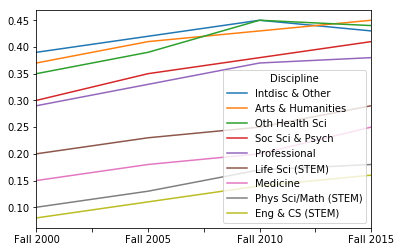

In [61]:
transposed_table.plot()

We can also take the average across disciplines for each year and add that to our table:

In [62]:
transposed_table["average"] = transposed_table[transposed_table.columns[1:]].mean(axis=1)
transposed_table

Discipline,Intdisc & Other,Arts & Humanities,Oth Health Sci,Soc Sci & Psych,Professional,Life Sci (STEM),Medicine,Phys Sci/Math (STEM),Eng & CS (STEM),average
Fall 2000,0.39,0.37,0.35,0.3,0.29,0.2,0.15,0.1,0.08,0.23000
Fall 2005,0.42,0.41,0.39,0.35,0.33,0.23,0.18,0.13,0.11,0.26625
Fall 2010,0.45,0.43,0.45,0.38,0.37,0.25,0.2,0.17,0.14,0.29875
Fall 2015,0.43,0.45,0.44,0.41,0.38,0.29,0.25,0.18,0.16,0.32000


Then we can plot that like above:

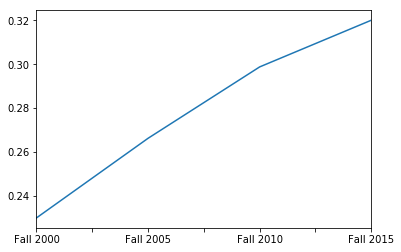

In [63]:
transposed_table['average'].plot()

#### Tables Essentials!

For your reference, here's a table of all the useful `Table` functions:

|Name|Example|Purpose|
|-|-|-|
|`Table`|`Table()`|Create an empty table, usually to extend with data|
|`Table.read_table`|`Table.read_table("my_data.csv")`|Create a table from a data file|
|`show` | `tbl.show(5)` | Show the first *N* rows of the table |
|`with_columns`|`tbl = Table().with_columns("N", np.arange(5), "2*N", np.arange(0, 10, 2))`|Create a copy of a table with more columns|
|`column`|`tbl.column("N")`|Create an array containing the elements of a column|
|`sort`|`tbl.sort("N")`|Create a copy of a table sorted by the values in a column|
|`where`|`tbl.where("N", are.above(2))`|Create a copy of a table with only the rows that match some *predicate*|
|`num_rows`|`tbl.num_rows`|Compute the number of rows in a table|
|`num_columns`|`tbl.num_columns`|Compute the number of columns in a table|
|`select`|`tbl.select("N")`|Create a copy of a table with only some of the columns|
|`drop`|`tbl.drop("2*N")`|Create a copy of a table without some of the columns|
|`take`|`tbl.take(np.arange(0, 6, 2))`|Create a copy of the table with only the rows whose indices are in the given array|

**Visualizations**

These are the different methods you can call on a table to plot data within that table. Insert the column names as the arguments `x column` and `y column` when calling these methods. 

|Plotting type | | Call structure |
|-|-|-|
|Scatter | | `table.scatter("x column", "y column")` |
|Line | | `table.plot("x column", "y column")` |
|Bar | | `table.bar("x column", "y column")` |
|Horiz. Bar | | `table.barh("x column", "y column")` |
|Histogram | | `table.hist("x axis", bins(optional), unit(optional))` |

---

## 2. UCOP Payroll Dataset

Let's look at another dataset that has the payroll for all UC empoloyees:

In [64]:
UCB_data = Table.read_table('data/UCOP.csv')
UCB_data.show(5)

Year,Location,First Name,Last Name,Title,Gross Pay,Regular Pay,Overtime Pay,Other Pay
2015,Berkeley,BARIKA,BURTON,ACAD ACHIEVEMENT CNSLR 2,54861,52541,0,2320
2015,Berkeley,MAYRA,GONZALEZ,ACAD ACHIEVEMENT CNSLR 2,51624,51624,0,0
2015,Berkeley,DIANA,FLORES,ACAD ACHIEVEMENT CNSLR 2,48880,47593,787,500
2015,Berkeley,KATHERINE,CASTRO,ACAD ACHIEVEMENT CNSLR 2,48646,48371,275,0
2015,Berkeley,LILIANA,IGLESIAS,ACAD ACHIEVEMENT CNSLR 2,47080,47080,0,0


Let's look only at professors. To do this, we need to use a new function `where`. The general form of this function is:

```python
table.where("column_name", "predicate")
```

In [65]:
rd = UCB_data.select(2,3,4,5).sort(3, descending=True)
professors = rd.where("Title", are.equal_to("PROF-AY"))
professors.show(5)

First Name,Last Name,Title,Gross Pay
STEPHEN,SHORTELL,PROF-AY,465004
ROBERT,BIRGENEAU,PROF-AY,451845
BIN,YU,PROF-AY,382058
OMAR,YAGHI,PROF-AY,368771
MARK,D'ESPOSITO,PROF-AY,363704


Big money!

We can visualize the distribution of pay with a histogram, but the histogram (counting frequencies of a specific pay level) will change depending upon the "bin size" of these pay levels. We can make an interactive slider to see this:

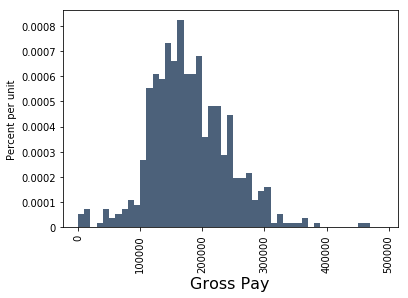

In [66]:
def hist_bins(bin_size=1):
    professors.select(3).hist(bins=np.arange(0,500000,bin_size*2000))

slider = widgets.IntSlider(min=1,max=10,step=1,value=5)
display(widgets.interactive(hist_bins, bin_size=slider))

#### Question: What are the drawbacks and advantages of different bin sizes?

### Salary for males vs. females on the UC payroll

While we don't have gender data in this dataset, we can use a pre-trained machine learning model to predict gender based on first name (we will forget for a moment that creating binary categories of male and female is problematic to begin with). While this is ***certainly not 100% accurate***, it is more like around 80%, we can use it to get a better idea of salaries for different genders.

Here is an example of what the classification model can do:

In [67]:
from scripts.gender import classify_gender

classify_gender("Daniel"), classify_gender("Charis"), classify_gender("Niklaus"), classify_gender("Maureen")

[nltk_data] Downloading package names to /srv/app/nltk_data...
[nltk_data]   Package names is already up-to-date!


('MALE', 'FEMALE', 'MALE', 'FEMALE')

We can add a new column to our professors table with the gender classification output by the model for each professor's name.

In [68]:
professors.append_column("Gender", [classify_gender(name) for name in professors['First Name']])
professors.show(10)

First Name,Last Name,Title,Gross Pay,Gender
STEPHEN,SHORTELL,PROF-AY,465004,MALE
ROBERT,BIRGENEAU,PROF-AY,451845,MALE
BIN,YU,PROF-AY,382058,MALE
OMAR,YAGHI,PROF-AY,368771,MALE
MARK,D'ESPOSITO,PROF-AY,363704,MALE
JOHN,HARTWIG,PROF-AY,354461,MALE
JASJEET,SEKHON,PROF-AY,344879,MALE
TROND,PETERSEN,PROF-AY,337817,MALE
ALEXANDER,PINES,PROF-AY,327886,MALE
SAUL,PERLMUTTER,PROF-AY,327861,MALE


Notice the incorrect classification of Bin Yu. These models aren't perfect! They were like trained on common English names, and so take these results with a grain of salt. But either way, we see in the top 10 salaries that 9 are male!

**Challenge**

Now let's investigate the average salary amounts for female vs. male professors, try to use what you've learned so far to get the `mean` of `Gross Pay` by gender from the `professors` table, and then make a `bar` plot (refresh yourself on how to use this in the table at the top of the section!):

In [69]:
# task

#### Question: What can we conclude from this analysis?

---

## 3. Silicon Valley

These data are compiled from EEO-1 reports from Apple, Twitter, Salesforce, Facebook, Microsoft, and Intel. The EEO-1 is a document required by the federal government that provides the raw numbers of employees in each of the categories below. We summed the most recent data (all from 2014-16) for these companies to get the table below.

In [70]:
tech_data = Table.read_table('data/eeo-aggregate.csv')
tech_data.show()

Job Categories,Hispanic or Latino Male,Hispanic or Latino Female,White Male,Black or African American Male,Native Hawaiian or Pacific Islander Male,Asian Male,American Indian or Alaska Native Male,Two or More Races Male,White Female,Black or African American Female,Native Hawaiian or Pacific Islander Female,Asian Female,American Indian or Alaska Native Female,Two or More Races Female,All Male,All Female
Executive/Senior Officials and Managers,21,21,554,10,1,117,2,6,140,4,0,34,0,2,1422,402
First/mid Officials and Managers,1160,1160,14628,494,31,5320,71,197,4807,245,21,1640,13,95,43802,15962
Professionals,4789,4789,50183,2330,165,33459,325,1200,14440,1034,77,12771,118,546,184902,67550
Technicians,2868,2868,12444,1891,93,1585,159,414,3314,1296,32,576,49,233,38908,16736
Sales Workers,3008,3008,13491,2349,125,1559,68,502,5807,1268,62,896,42,310,42204,22786
Administrative Support,703,703,2140,358,31,411,14,90,3339,530,40,762,34,155,7494,11126
Craft Workers,89,89,398,26,0,34,9,7,23,3,0,2,2,0,1126,238
Operatives,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Laborers and Helpers,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0
Service Workers,133,133,76,12,6,46,1,6,27,12,2,16,0,3,560,386


We can look at a basic bar chart of all males and females by job category:

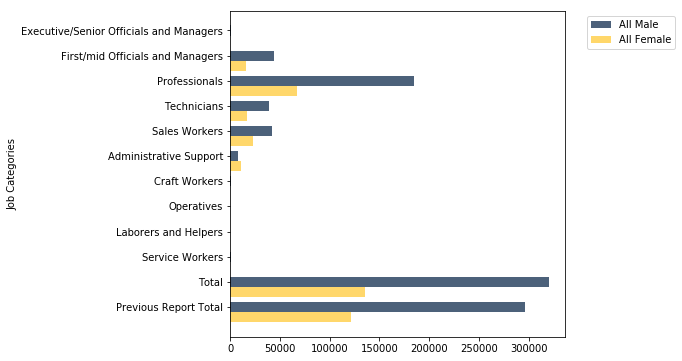

In [71]:
tech_data.select(['Job Categories', 'All Male', 'All Female']).barh('Job Categories')

We can also break down each gender by race:

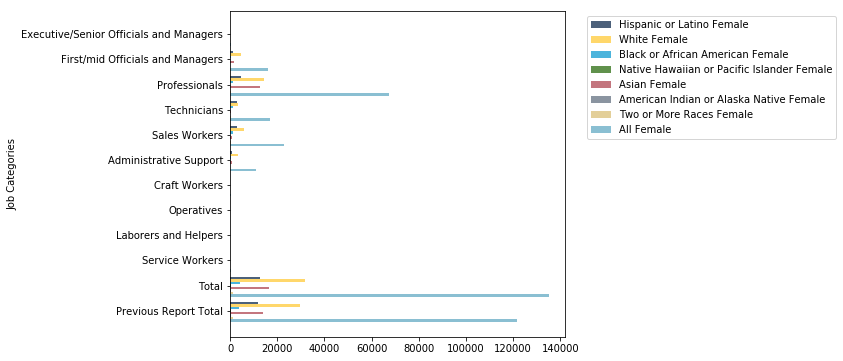

In [72]:
females = [c for c in tech_data.to_df().columns if "Female" in c]
tech_data.select(['Job Categories'] + females).barh('Job Categories')

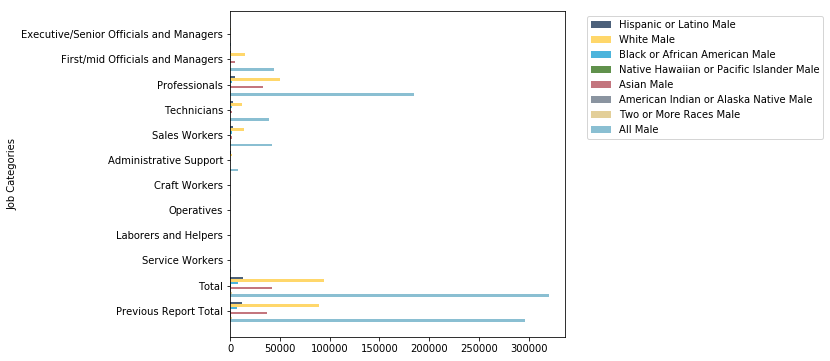

In [73]:
males = [c for c in tech_data.to_df().columns if "Male" in c]
tech_data.select(['Job Categories'] + males).barh('Job Categories')

#### Question: What do you see in this data? 
(**Note**: It might be a little hard to see since the bars are so small - zoom in!)

---

## 4. Bay Area Census data

Let's read in a CSV file with Bay Area employment data:

In [74]:
bay_area = Table().read_table('data/bay_area_data.csv')
bay_area.show(5)

YEAR,SERIAL,HWTSUPP,CPSID,ASECFLAG,HFLAG,METAREA,MONTH,PERNUM,CPSIDP,WTSUPP,SEX,RACE,OCC2010,INCTOT
2013,92957,2862.21,2.01112e+13,1,nan,7365,3,1,2.01112e+13,2862.21,1,100,9620,25000
2013,92957,2862.21,2.01112e+13,1,nan,7365,3,2,2.01112e+13,4541.27,1,100,6260,12011
2013,92957,2862.21,2.01112e+13,1,nan,7365,3,3,2.01112e+13,4513.16,1,100,6420,25000
2013,92957,2862.21,2.01112e+13,1,nan,7365,3,4,2.01112e+13,4513.16,1,100,9130,10000
2013,92959,2385.98,2.01212e+13,1,nan,7365,3,1,2.01212e+13,2385.98,2,652,3530,53515


### Job code subset

As you can see above, this table has a lot of information. The variables are in the columns and each row represents an individual. First, we will subset this table to only include the occupations we want to analyze. Job codes are listed in the column `OCC2010`. We're going to focus on management and stem jobs. We'll zoom back out at the end to get a big picture conclusion.

In [75]:
job_codes = [10, 20, 30, 100, 110, 120, 130, 140, 150, 160, 220, 300, 310, 330, 350, 360, 410, 420,
             620, 700, 710, 720, 730, 800, 820, 940, 950, 1000, 1010, 1020, 1050, 1060, 1100, 1200, 1220,
             1230, 1240, 1350, 1360, 1400, 1410, 1420, 1430, 1450, 1460, 1540, 1550, 1720, 1910, 1920,
             1980, 2840, 2900, 4000, 4010, 4030, 4050, 4060, 4110, 4120, 4130, 4140, 4150, 4200, 4210,
             4220, 4230, 4250, 4720, 5000, 7720, 7730, 7900, 8000, 8010, 8030, 8060, 8800, 8830, 7700,
             9620, 9630, 9640]

df = bay_area.to_df()
bay_area_cut = Table.from_df(df.loc[df['OCC2010'].isin(job_codes)])
bay_area_cut.show(5)

YEAR,SERIAL,HWTSUPP,CPSID,ASECFLAG,HFLAG,METAREA,MONTH,PERNUM,CPSIDP,WTSUPP,SEX,RACE,OCC2010,INCTOT
2013,92957,2862.21,2.01112e+13,1,nan,7365,3,1,2.01112e+13,2862.21,1,100,9620,25000
2013,92966,1636.31,2.01112e+13,1,nan,7365,3,1,2.01112e+13,1636.31,1,100,220,74645
2013,92966,1636.31,2.01112e+13,1,nan,7365,3,3,2.01112e+13,1589.28,2,100,4110,6240
2013,92967,3141.2,2.01112e+13,1,nan,7365,3,3,2.01112e+13,3384.73,1,100,1050,0
2013,92969,3068.09,2.01112e+13,1,nan,7365,3,1,2.01112e+13,3068.09,1,100,1410,115421


Although still large, a table with 13110 rows has now decreased to 2550 by selecting rows that match our `job_codes` array. Let's subset this further by picking out specific variables we want to look at:

In [76]:
cut_bay_area= bay_area_cut.drop("CPSID","ASECFLAG","HWTSUPP", "HFLAG", "MONTH", "PERNUM", "CPSIDP","WTSUPP")
cut_bay_area.show(5)

YEAR,SERIAL,METAREA,SEX,RACE,OCC2010,INCTOT
2013,92957,7365,1,100,9620,25000
2013,92966,7365,1,100,220,74645
2013,92966,7365,2,100,4110,6240
2013,92967,7365,1,100,1050,0
2013,92969,7365,1,100,1410,115421


The column of job codes in "OCC2010" still does not paint a picture of who is doing which jobs. The code cell below is a bit complicated, but all it does is create a new column for us with the `job_categories` mapping the job codes, so we can collapse some of these jobs into useful categories:

In [77]:
job_categories = {"STEM": [700, 1000, 1010, 1020, 1050, 1220, 1230, 1240, 1350, 1360, 1400, 1410, 1420, 1430, 1450, \
                           1460, 1540, 1550, 1720, 1910, 1920, 1980,2840, 2900,7720, 7730, 7900, 8000, 8010,8030, \
                           8060, 8800, 8830],
                  "SERVICE": [7700, 9620, 9630, 9640, 4000, 4010, 4030, 4050, 4060, 4110, 4120, 4130, 4140, 4150, 4720],
                  "FINANCIAL": [120, 800, 820, 940, 950],
                  "CUSTODIAL": [4200, 4210, 4220, 4230, 4250],
                  "MANAGEMENT": [130, 150, 160, 220, 30, 100, 410, 420],
                  "STEM_MANAGER": [140,300,330, 350, 360, 1060, 1100],
                  "ADMINISTRATOR": [10,20]}

job_categories = dict((v,k) for k in job_categories for v in job_categories[k])

sectors = []
for job in cut_bay_area.column("OCC2010"):
    try:
        sectors.append(job_categories[job])
    except:
        sectors.append("UNKNOWN")

Now we can add the sector of each individual's job into a column by using the `with_column` function as seen below. 

In [78]:
with_sector = cut_bay_area.with_column('SECTOR', sectors)
with_sector

YEAR,SERIAL,METAREA,SEX,RACE,OCC2010,INCTOT,SECTOR
2013,92957,7365,1,100,9620,25000,SERVICE
2013,92966,7365,1,100,220,74645,MANAGEMENT
2013,92966,7365,2,100,4110,6240,SERVICE
2013,92967,7365,1,100,1050,0,STEM
2013,92969,7365,1,100,1410,115421,STEM
2013,92970,7365,1,100,1020,117865,STEM
2013,92973,7365,1,100,4220,29017,CUSTODIAL
2013,92976,7365,2,651,350,130030,STEM_MANAGER
2013,92980,7365,2,651,720,571,UNKNOWN
2013,92983,7365,1,100,9620,19825,SERVICE


You might have noticed this earlier but race in this table is listed as a number. To make analyis more intuitive, let's change the race codes into what they mean. The census documentation tells use that we can map races to the followin codes:

In [79]:
race_dict = {'White': list(range(100,200)),
             'Black': list(range(200,300)),
             'Indigenous': list(range(300,400)),
             'Asian': list(range(400,500)),
             'Pacific Islander': list(range(500,600)),
             'Other': list(range(600,700)),
             'NA': list(range(700,900))}

race_dict = dict((v,k) for k in race_dict for v in race_dict[k])

with_race = Table.from_df(with_sector.to_df().replace({"RACE": race_dict, "SEX": {1: "MALE", 2: "FEMALE"}}))
with_race.show(5)

YEAR,SERIAL,METAREA,SEX,RACE,OCC2010,INCTOT,SECTOR
2013,92957,7365,MALE,White,9620,25000,SERVICE
2013,92966,7365,MALE,White,220,74645,MANAGEMENT
2013,92966,7365,FEMALE,White,4110,6240,SERVICE
2013,92967,7365,MALE,White,1050,0,STEM
2013,92969,7365,MALE,White,1410,115421,STEM


Let's make a quick bar chart for the races in our sample:

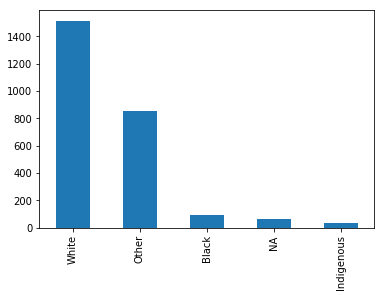

In [80]:
with_race.to_df()['RACE'].value_counts().plot.bar()

As you can see, "White" is a pretty big ethnicity group, this may be due to the fact that "White" encompasses a lot according to the 2010 U.S. Census. The definitions of White include Middle Easterners, North Africans and the majority of Hispanic people in the United States. 

Let's try looking at job `SECTOR` by `SEX`:

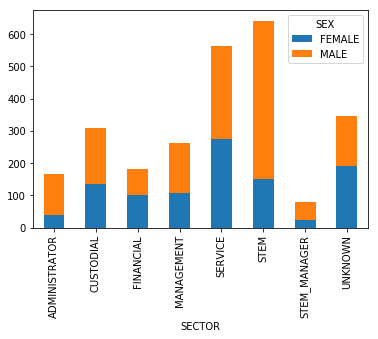

In [81]:
with_race.to_df().groupby(['SECTOR', 'SEX'])['SEX'].count().unstack().plot.bar(stacked=True)

#### Challenge
Copy the code above but change `SEX` to `RACE` to see the same analysis breakdown by `RACE`:

In [82]:
# task

We can write a short `for` loop to print out bar charts for each `SECTOR` broken down by `SEX`:

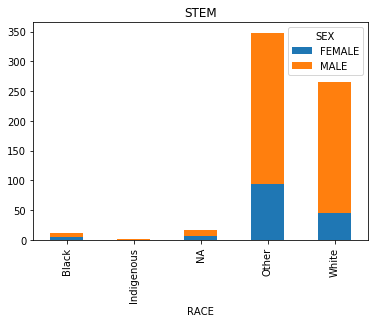

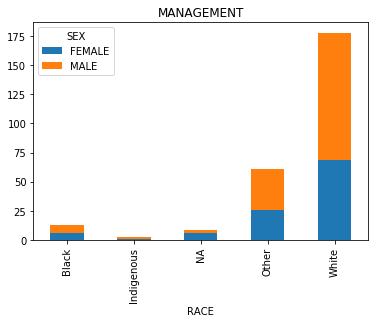

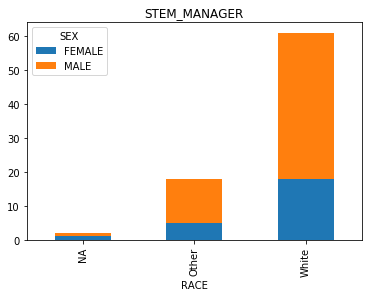

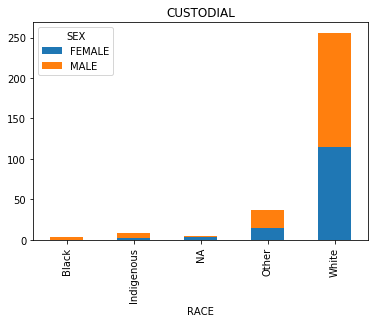

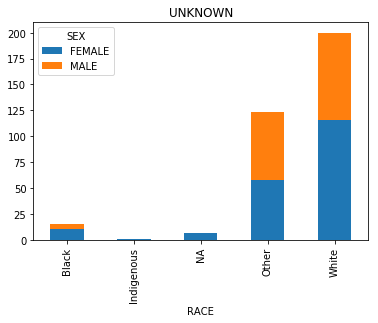

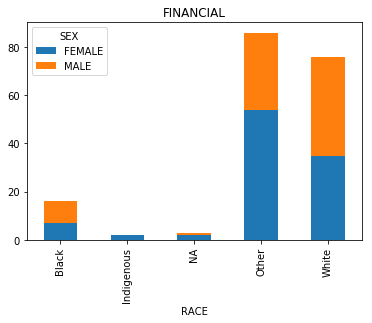

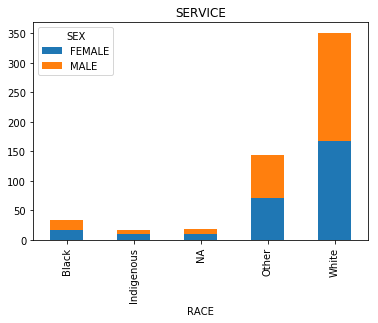

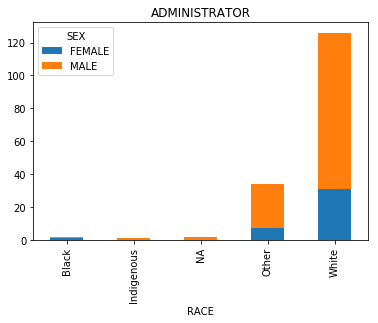

In [83]:
for s in set(sectors):
    df = with_race.to_df()
    df[df['SECTOR'] == s].groupby(['RACE', 'SEX'])['SEX'].count().unstack().plot.bar(stacked=True, title=s)

By looking at the average mean of each part of the sample, we see some differences. 

### Income by race and gender

**Challenge**

Use our table `with_race` to get `groupby` `SEX` and then get the mean of `INCTOT`, then plot this:

In [84]:
# task

Do the same for `RACE`:

In [85]:
# task

---

This type of comparison isn't very reliable. We will perform a p-value test to determine if the change of income across races/ sex is statistically significant. To do this we first need to bootstrap our sample to make a 95% confidence interval of the estimated population mean.  We have a pre-defined function called `bootstrap_median` that we can use to do this. The following block of code computes and plots the median confidence interval for each sex using `bootstrap_median`.

Let's look at `MALE` vs. `FEMALE`:

The median 95% Confidence Interval for MALE is [ 70000.  80000.]
The median 95% Confidence Interval for FEMALE is [ 37000.  41600.]


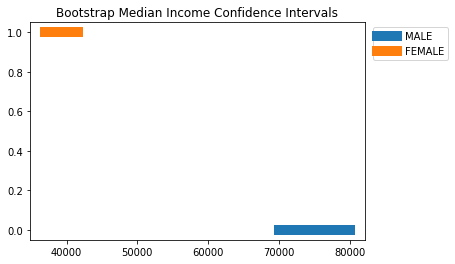

In [86]:
from scripts.gws_module import bootstrap_median # Importing the bootstrap_median function

median_dict = {}
for i, s in enumerate(['MALE', 'FEMALE']):
    subset = Table.from_df(df[df['SEX'] == s])
    medians = bootstrap_median(subset, "INCTOT", 1000) # Using bootstrap_median here
    median_dict[s] = medians
    left = percentile(2.5, medians)
    right = percentile(97.5, medians)
    CI = make_array(left, right)
    print("The median 95% Confidence Interval for " + s + " is", CI)
    plt.plot(CI, make_array(i, i), lw=10, label=s)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.title('Bootstrap Median Income Confidence Intervals')

We can calculate the p-value from the median samples to determine whether the difference is significant:

In [87]:
stats.ttest_ind(median_dict['MALE'], median_dict['FEMALE'])

Ttest_indResult(statistic=390.1855811974699, pvalue=0.0)

We can also look at `RACE`:

The median 95% Confidence Interval for Black is [ 40100.  60645.]
The median 95% Confidence Interval for White is [ 43300.  52600.]
The median 95% Confidence Interval for NA is [ 40000.  73475.]
The median 95% Confidence Interval for Indigenous is [ 18003.  32060.]
The median 95% Confidence Interval for Other is [ 66008.  80000.]


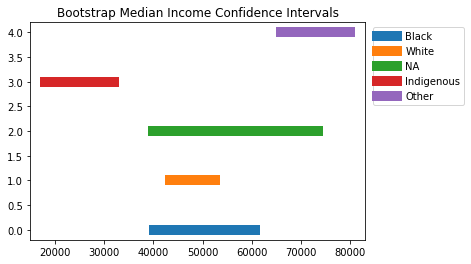

In [88]:
median_dict = {}
for i, r in enumerate(set(df['RACE'])):
    subset = Table.from_df(df[df['RACE'] == r])
    medians= bootstrap_median(subset, "INCTOT", 1000) # Using bootstrap_median again
    median_dict[r] = medians
    left = percentile(2.5, medians)
    right = percentile(97.5, medians)
    CI = make_array(left, right)
    print("The median 95% Confidence Interval for " + r + " is", CI)
    plt.plot(CI, make_array(i, i), lw=10, label=r)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.title('Bootstrap Median Income Confidence Intervals')

We can do a one way F test to see if there is significance in the difference between the median samples:

In [89]:
stats.f_oneway(median_dict['NA'], median_dict['Other'], median_dict['Indigenous'], median_dict['White'], median_dict['Black'])

F_onewayResult(statistic=11008.508375011059, pvalue=0.0)

We can use a fancy tool to give us all the combinations of `SEX` and `RACE` and then get the confidence intervals for those:

In [90]:
import itertools

combos = [i for i in itertools.product(set(df['RACE']), ['MALE', 'FEMALE'])]
combos

[('Black', 'MALE'),
 ('Black', 'FEMALE'),
 ('White', 'MALE'),
 ('White', 'FEMALE'),
 ('NA', 'MALE'),
 ('NA', 'FEMALE'),
 ('Indigenous', 'MALE'),
 ('Indigenous', 'FEMALE'),
 ('Other', 'MALE'),
 ('Other', 'FEMALE')]

The median 95% Confidence Interval for Black MALE is [ 38620.  82001.]
The median 95% Confidence Interval for Black FEMALE is [ 32000.  60576.]
The median 95% Confidence Interval for White MALE is [ 60014.  75010.]
The median 95% Confidence Interval for White FEMALE is [ 27500.  35422.]
The median 95% Confidence Interval for NA MALE is [  30000.  101700.]
The median 95% Confidence Interval for NA FEMALE is [ 30000.  50577.]
The median 95% Confidence Interval for Indigenous MALE is [ 14000.  43682.]
The median 95% Confidence Interval for Indigenous FEMALE is [ 15000.  35000.]
The median 95% Confidence Interval for Other MALE is [ 80000.  92000.]
The median 95% Confidence Interval for Other FEMALE is [ 48000.  63610.]


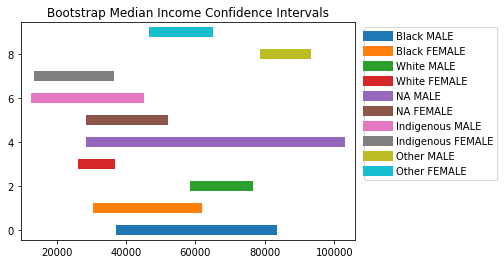

In [91]:
for i, c in enumerate(combos):
    subset = df[df['RACE'] == c[0]]
    subset = Table.from_df(subset[subset['SEX'] == c[1]])
    medians= bootstrap_median(subset, "INCTOT", 1000)
    left = percentile(2.5, medians)
    right = percentile(97.5, medians)
    CI = make_array(left, right)
    print("The median 95% Confidence Interval for " + c[0] + ' ' + c[1] + " is", CI)
    plt.plot(CI, make_array(i, i), lw=10, label=c[0] + ' ' + c[1])
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.title('Bootstrap Median Income Confidence Intervals')

#### Task: Discuss this plot with the people around you and write a response below.

---

## 5. Compared to entire Bay Area census sample

So how does our tech-biased subset compare to the entire census subset of the Bay Area? First we'll do some quick processing to get out non-responses and relabel the Bay Area subset: 

In [92]:
bay_area2 = bay_area.to_df().replace({"RACE": race_dict, "SEX": {1: "MALE", 2: "FEMALE"}})
bay_area2 = bay_area2[bay_area2["INCTOT"] != 0]
bay_area2 = bay_area2[bay_area2["INCTOT"] != 99999999]
bay_area2

,YEAR,SERIAL,HWTSUPP,CPSID,ASECFLAG,HFLAG,METAREA,MONTH,PERNUM,CPSIDP,WTSUPP,SEX,RACE,OCC2010,INCTOT
0,2013,92957,2862.21,2.011120e+13,1,NaN,7365,3,1,2.011120e+13,2862.21,MALE,White,9620,25000
1,2013,92957,2862.21,2.011120e+13,1,NaN,7365,3,2,2.011120e+13,4541.27,MALE,White,6260,12011
2,2013,92957,2862.21,2.011120e+13,1,NaN,7365,3,3,2.011120e+13,4513.16,MALE,White,6420,25000
3,2013,92957,2862.21,2.011120e+13,1,NaN,7365,3,4,2.011120e+13,4513.16,MALE,White,9130,10000
4,2013,92959,2385.98,2.012120e+13,1,NaN,7365,3,1,2.012120e+13,2385.98,FEMALE,Other,3530,53515
5,2013,92959,2385.98,2.012120e+13,1,NaN,7365,3,2,2.012120e+13,2385.98,MALE,Other,3110,71000
7,2013,92963,3137.80,2.011120e+13,1,NaN,7365,3,1,2.011120e+13,3137.80,FEMALE,White,430,77800
8,2013,92963,3137.80,2.011120e+13,1,NaN,7365,3,2,2.011120e+13,3309.68,MALE,White,4620,23520
9,2013,92963,3137.80,2.011120e+13,1,NaN,7365,3,3,2.011120e+13,3309.68,MALE,White,4700,14120
10,2013,92964,2342.21,2.011120e+13,1,NaN,7365,3,1,2.011120e+13,2342.21,FEMALE,NA,5700,49000


Let's check to see what our sample contains in terms of `SEX` and `RACE`:

In [93]:
bay_area2['SEX'].value_counts()

MALE      4575
FEMALE    4466
Name: SEX, dtype: int64

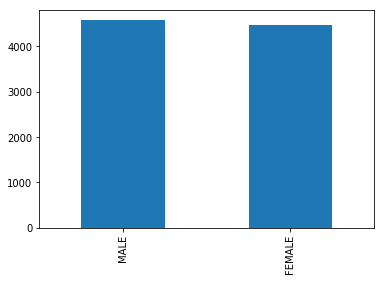

In [94]:
bay_area2['SEX'].value_counts().plot.bar()

In [95]:
bay_area2['RACE'].value_counts()

White         5307
Other         2832
Black          500
NA             267
Indigenous     135
Name: RACE, dtype: int64

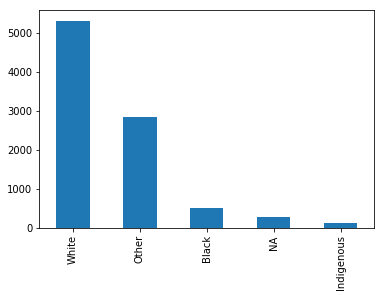

In [96]:
bay_area2['RACE'].value_counts().plot.bar()

We can then look at income by `SEX` and `RACE`. Let's start with `SEX`.

### `SEX`

SEX
FEMALE    45616
MALE      78807
Name: INCTOT, dtype: int64

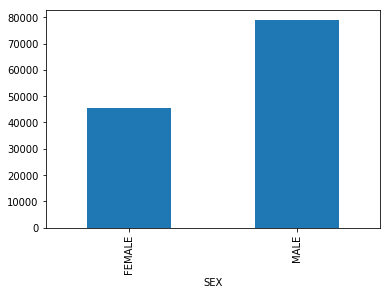

In [97]:
bay_area_mean_sex = bay_area2.groupby(['SEX'])['INCTOT'].mean()
bay_area_mean_sex.plot.bar()
bay_area_mean_sex

We'll recall that our biased subset had much higher means, but similar disparity:

SEX
FEMALE     57354
MALE      104469
Name: INCTOT, dtype: int64

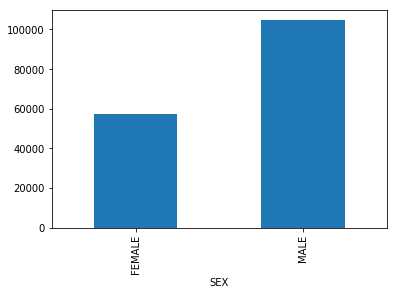

In [98]:
# this plot is the same as the one in the previous section with job codes - copied here for your reference
with_race_mean_sex = with_race.to_df().groupby(['SEX'])['INCTOT'].mean()
with_race_mean_sex.plot.bar()
with_race_mean_sex

UCB is doing much better than both of these subsets:

Gender
FEMALE    158435
MALE      185467
Name: Gross Pay, dtype: int64

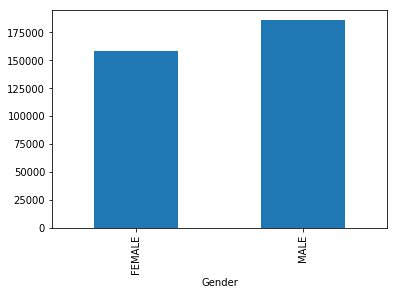

In [99]:
professors_mean_sex = professors.to_df().groupby(['Gender'])['Gross Pay'].mean()
professors_mean_sex.plot.bar()
professors_mean_sex

We can put all of these bar charts together to get a better idea of how the numbers in each of these subsets relate to each other:

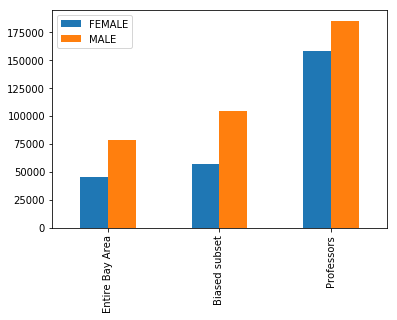

In [100]:
b = pd.DataFrame([bay_area_mean_sex, with_race_mean_sex, professors_mean_sex], ["Entire Bay Area", "Biased subset", "Professors"])
b.plot.bar()

Again, combining the charts in a different way to group the numbers for each gender together:

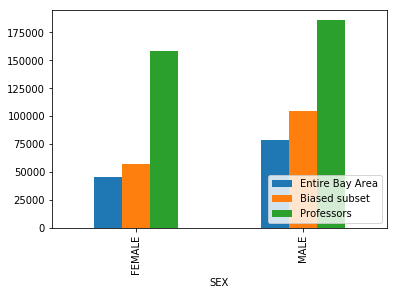

In [101]:
b2 = pd.DataFrame(list(zip(bay_area_mean_sex, with_race_mean_sex, professors_mean_sex)), bay_area_mean_sex.keys())
ax = b2.plot.bar()
ax.legend(["Entire Bay Area", "Biased subset", "Professors"], loc=4)

The table below is the complete table with the wages of each gender for each group that we calculated above, which we used in the charts we just created.

In [102]:
b

,FEMALE,MALE
Entire Bay Area,45616,78807
Biased subset,57354,104469
Professors,158435,185467


We can also calculate the differences between average wages of males and females in each of our population subsets.

To calculate the difference, we subtract the amount of each gender group's wages from each other, and get the numbers below. These numbers represent how much more males earn than females in each group.

In [103]:
b['MALE'] - b['FEMALE']

Entire Bay Area    33191
Biased subset      47115
Professors         27032
dtype: int64

How about `FEMALE` as a percentage of `MALE`?

In [104]:
b['FEMALE'] / b['MALE']

Entire Bay Area    0.578832
Biased subset      0.549005
Professors         0.854249
dtype: float64

### `RACE`
We can also look at `RACE` in the larger Bay Area subset:

In [105]:
bay_area_mean_race = bay_area2.groupby(['RACE'])['INCTOT'].mean()
bay_area_mean_race

RACE
Black         46507.620000
Indigenous    35791.237037
NA            56991.700375
Other         58965.673729
White         66699.061805
Name: INCTOT, dtype: float64

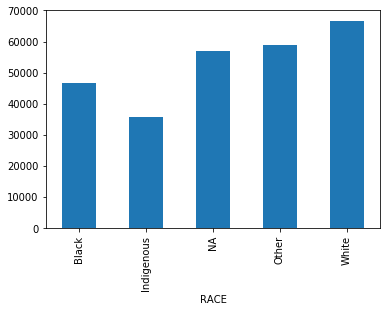

In [106]:
bay_area_mean_race.plot.bar()

Our biased subset was also great here:

In [107]:
with_race_mean_race = with_race.to_df().groupby(['RACE'])['INCTOT'].mean()
with_race_mean_race

RACE
Black         68431.408602
Indigenous    35181.969697
NA            63854.098361
Other         85841.176471
White         88473.216127
Name: INCTOT, dtype: float64

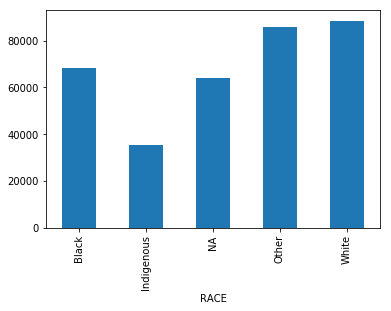

In [108]:
with_race_mean_race.plot.bar()

Again, we'll put these charts together so we can better compare how these different subsets' numbers relate to each other:

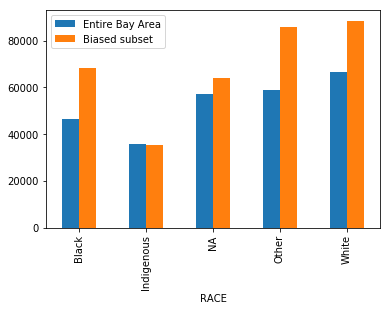

In [109]:
b = pd.DataFrame(list(zip(bay_area_mean_race, with_race_mean_race)), bay_area_mean_race.keys())
ax = b.plot.bar(stacked=False)
ax.legend(["Entire Bay Area", "Biased subset"])

As we noted when we were investigating the data from workers in the Tech industry, it is more helpful to consider race and gender together:

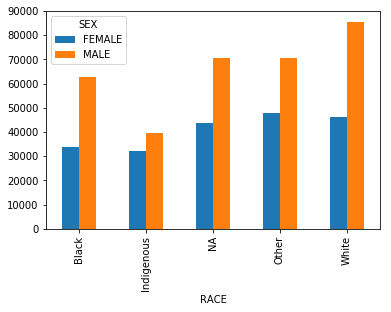

In [110]:
bay_area2.groupby(['RACE', 'SEX'])['INCTOT'].mean().unstack().plot.bar()

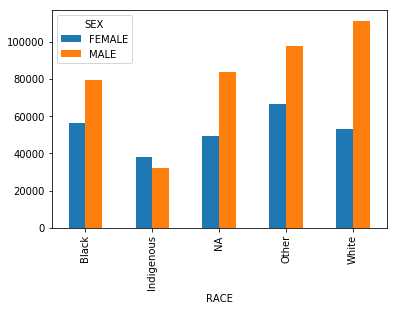

In [111]:
with_race.to_df().groupby(['RACE', 'SEX'])['INCTOT'].mean().unstack().plot.bar()

#### Question: Where are the disparities the worst?

---

***Please fill out our [modules feedback survey](https://goo.gl/forms/QCgq3B5uA5npe5ja2)!***